<span style="color:blue"> <font size="5">Jako zespół walidacyjny będziemy używać innego koloru żeby się wyróżnić</font> </span>

# INTRO

There are two separate target columns to predict, each in dataset 1 and dataset 2.

This notebook is about dataset 1

# 1. GETTING READY

In [67]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import os

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from fast_ml.feature_selection import get_duplicate_features
from fast_ml.feature_selection import get_constant_features

In [68]:
#import dataset
df = pd.read_csv("../data/dataset_1.csv")

# 2. DATASET INFO

In [69]:
# first five rows
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [70]:
# shape
df.shape

(50000, 301)

<span style="color:blue"> <font size="5">My byśmy już teraz podzielili na train/test/validacja, powinniście korzystać tylko z informacji która znajduje się w train, patrząc na całość wiecie rzeczy których normalnie moglibyście nie wiedzieć</font> </span>

In [71]:
# info
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 301 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    var_1    50000 non-null  int64  
 1    var_2    50000 non-null  int64  
 2    var_3    50000 non-null  float64
 3    var_4    50000 non-null  float64
 4    var_5    50000 non-null  float64
 5    var_6    50000 non-null  int64  
 6    var_7    50000 non-null  int64  
 7    var_8    50000 non-null  int64  
 8    var_9    50000 non-null  int64  
 9    var_10   50000 non-null  int64  
 10   var_11   50000 non-null  float64
 11   var_12   50000 non-null  float64
 12   var_13   50000 non-null  float64
 13   var_14   50000 non-null  int64  
 14   var_15   50000 non-null  int64  
 15   var_16   50000 non-null  float64
 16   var_17   50000 non-null  float64
 17   var_18   50000 non-null  float64
 18   var_19   50000 non-null  int64  
 19   var_20   50000 non-null  int64  
 20   var_21   50000 non-null  f

In [72]:
# description
df.describe()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.00000,...,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,0.002220,0.000060,15.593002,3.149633,608.681764,4.000000e+03,0.000300,0.035040,0.000240,0.00018,...,0.085164,0.009900,0.0,0.127260,0.086880,0.0,0.003060,12.462960,5.683960e+03,0.039820
std,0.108145,0.007746,1280.571855,2.740114,10951.361737,6.324492e+05,0.029999,0.322884,0.026832,0.03000,...,1.148319,0.214016,0.0,0.607019,0.622398,0.0,0.078808,832.417622,4.736482e+04,0.195538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,2.850000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
75%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000
max,9.000000,1.000000,207901.336500,35.280000,445500.000000,1.000000e+08,3.000000,6.000000,3.000000,6.00000,...,74.520000,12.000000,0.0,6.000000,33.000000,0.0,3.000000,134666.681100,2.857673e+06,1.000000


<span style="color:blue"> <font size="5">Nie ma sensu tego generować, z tego co widzieliśmy to w drugim zbiorze danych zakomentowaliście tą część kodu, tu też by wypadało. Dodatkowo wykonaliście histogramy na całym zbiorze danych, więc to samo co wyżej aplikuje się tutaj.</font> </span>

array([[<AxesSubplot:title={'center':'var_1'}>,
        <AxesSubplot:title={'center':'var_2'}>,
        <AxesSubplot:title={'center':'var_3'}>,
        <AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_5'}>,
        <AxesSubplot:title={'center':'var_6'}>,
        <AxesSubplot:title={'center':'var_7'}>,
        <AxesSubplot:title={'center':'var_8'}>,
        <AxesSubplot:title={'center':'var_9'}>,
        <AxesSubplot:title={'center':'var_10'}>,
        <AxesSubplot:title={'center':'var_11'}>,
        <AxesSubplot:title={'center':'var_12'}>,
        <AxesSubplot:title={'center':'var_13'}>,
        <AxesSubplot:title={'center':'var_14'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_16'}>,
        <AxesSubplot:title={'center':'var_17'}>],
       [<AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_19'}>,
        <AxesSubplot:title={'center':'var_20'}>,
        <AxesSubplot:title={

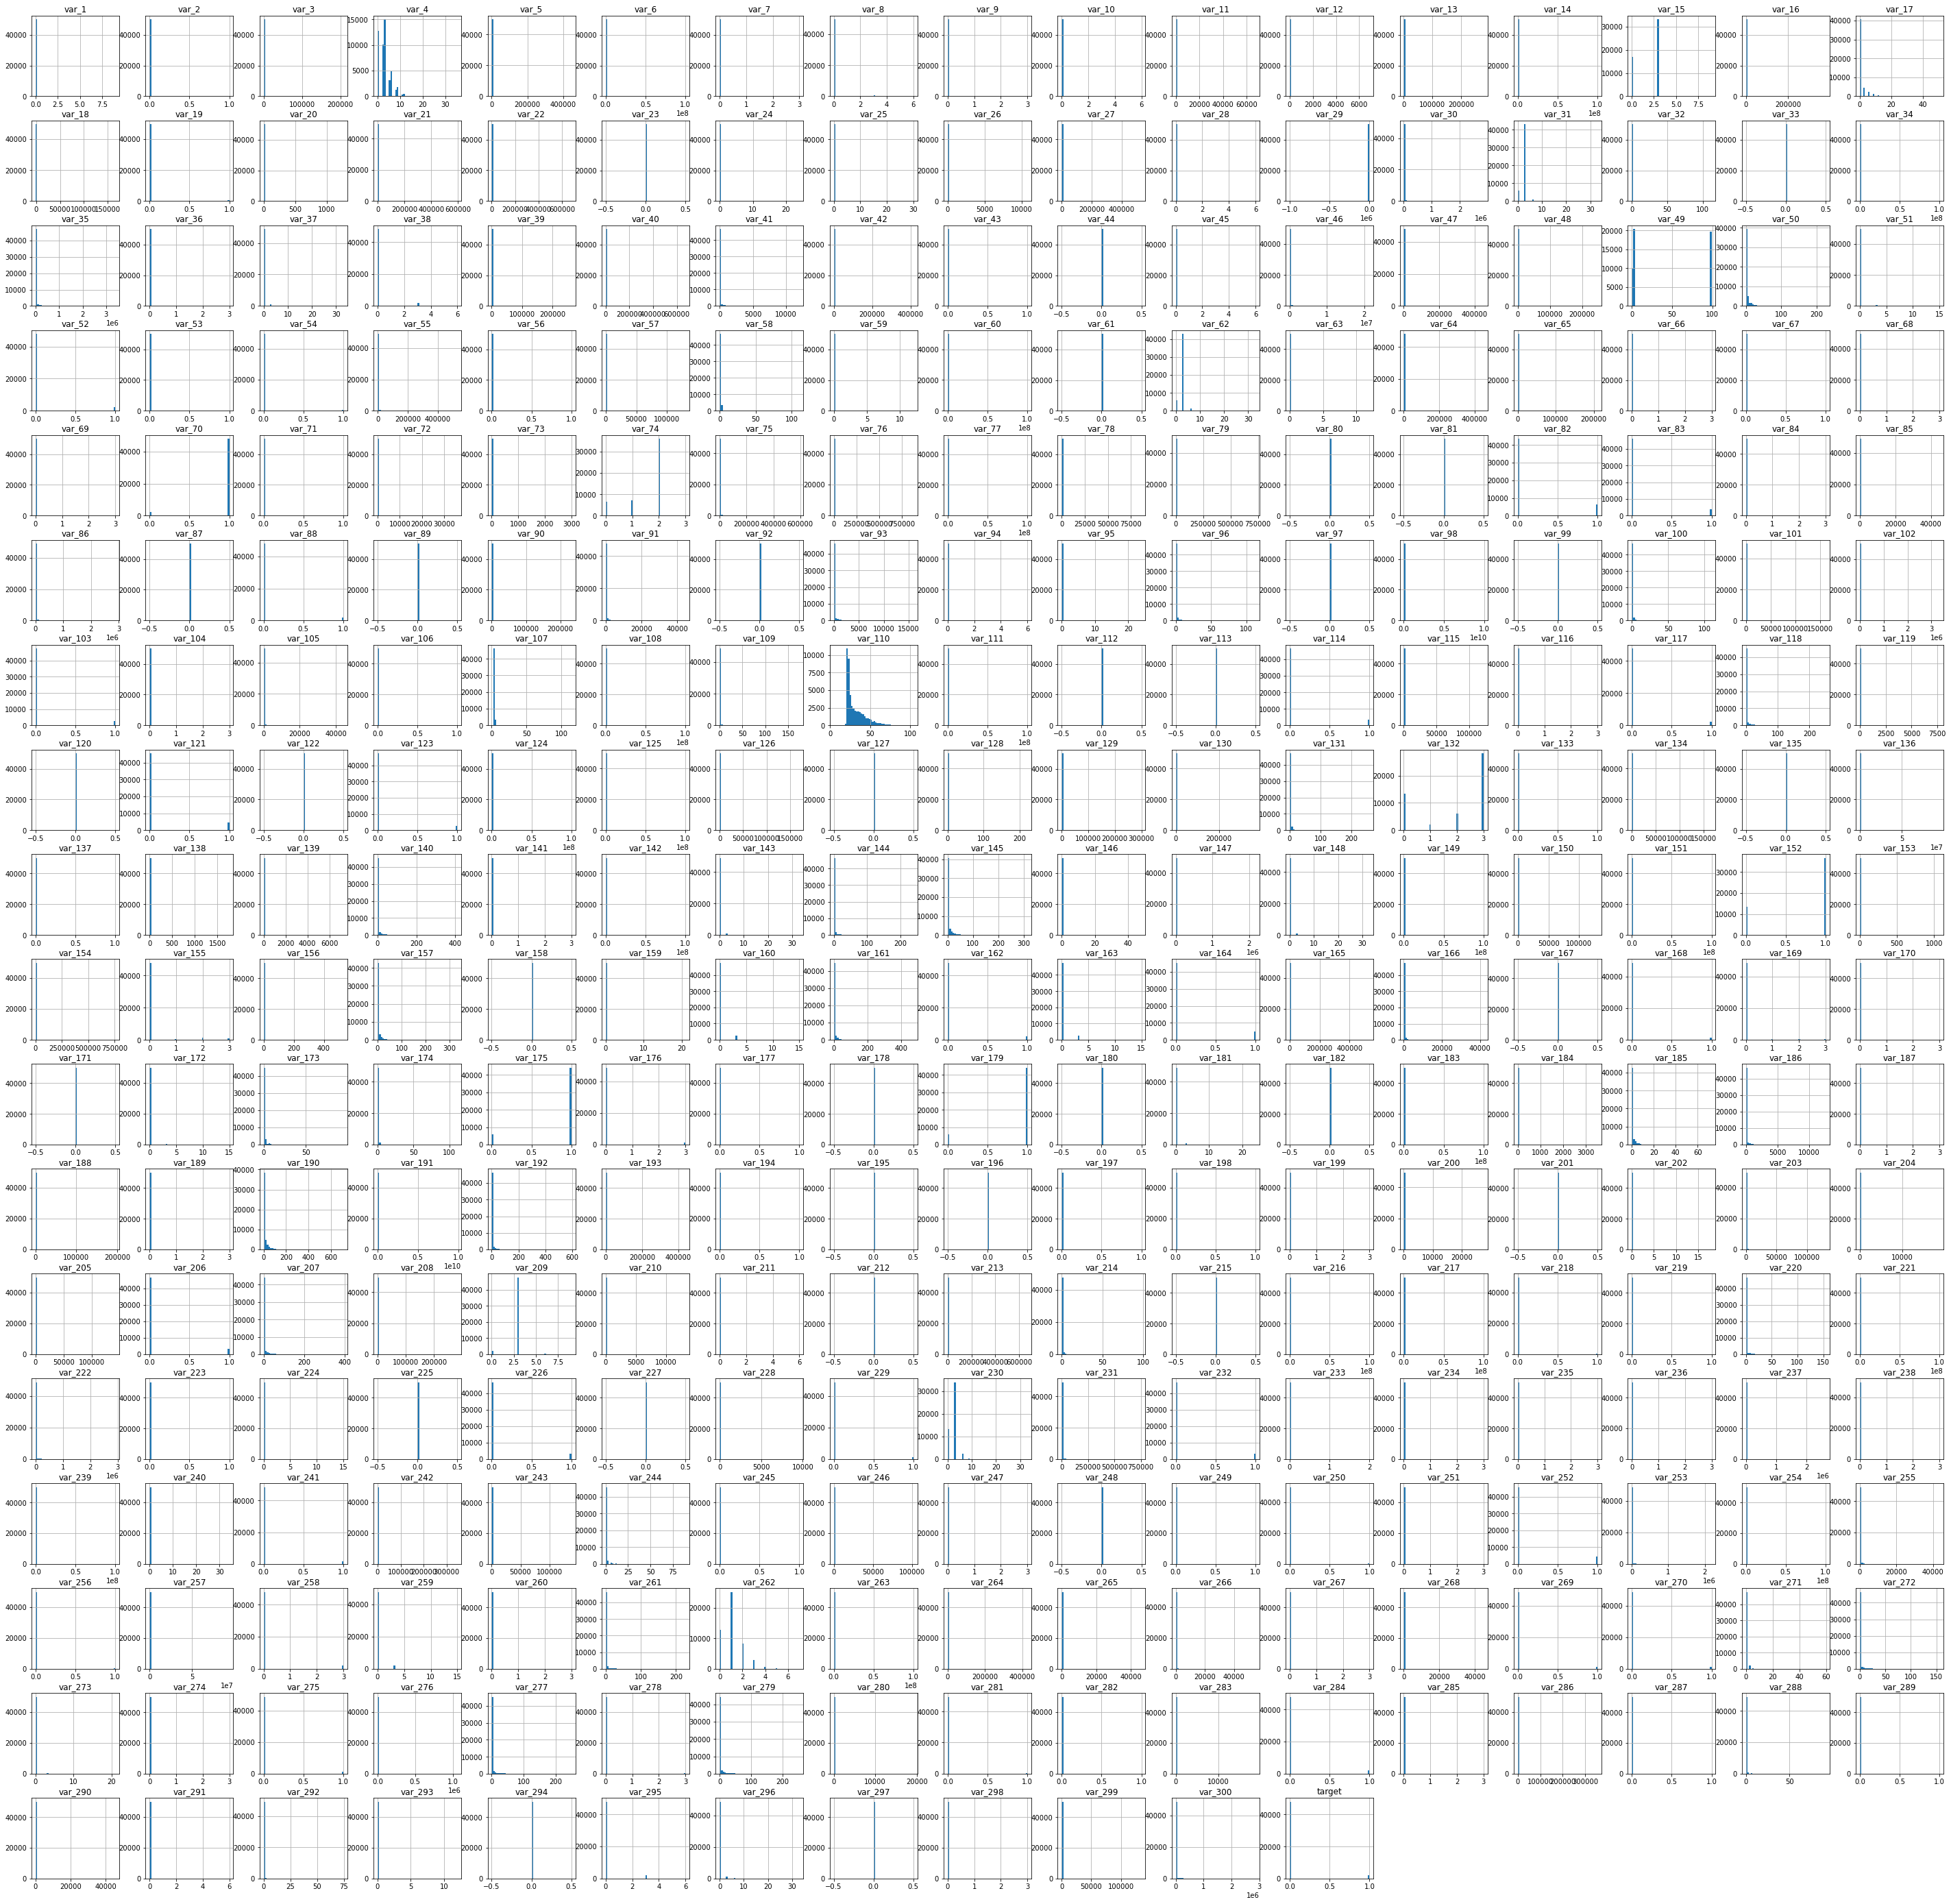

In [73]:
# histogram
# a lot of columns - rendering pretty long

df.hist(bins=50, figsize=(50, 50))

# 3. SPLITTING

In [74]:
# data on which we base
X = df.drop(columns=['target'])

# data which we predict
y = df['target']

<span style="color:blue"> <font size="5">Dobrze że ustaliliście random_state, proporcje rozmiarów zbiorów danych są ok </font> </span>

In [75]:
# getting train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# getting test and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, stratify=y_test, test_size=0.3, random_state=42
)

In [76]:
# checking shapes of X's
print(X.shape, X_train.shape, X_test.shape, X_val.shape)

(50000, 300) (35000, 300) (10500, 300) (4500, 300)


In [77]:
# checking shapes of y's
print(y.shape, y_train.shape, y_test.shape, y_val.shape)

(50000,) (35000,) (10500,) (4500,)


# EXPORTING

In [12]:
# exporting data
relative_path = "./validation"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)

X_train.to_csv('validation/X_train_dataset_1.csv', encoding='utf-8')
X_test.to_csv('validation/X_test_dataset_1.csv', encoding='utf-8')
X_val.to_csv('validation/X_val_dataset_1.csv', encoding='utf-8')

y_train.to_csv('validation/y_train_dataset_1.csv', encoding='utf-8')
y_test.to_csv('validation/y_test_dataset_1.csv', encoding='utf-8')
y_val.to_csv('validation/y_val_dataset_1.csv', encoding='utf-8')

### in theory outliers, NAs handling and NAs replacing should be before features number reduction. Otherwise NAs replacing can produce type of columns that could have been handeled with features number reduction methods (which was already done). Alas, doing so would mean analysing 300 separeted histogram plots manually so as to determine whether column has outlier or not which is not impossible but undoubtadly needlessly hard. So we decided to reduce number of features first and then whilst having only few columns (~50) look for possible outliers through plots

# 4. FEATURES NUMBER REDUCTION

## 4.1. Duplicate features

<span style="color:blue"> <font size="5">Sprawdzimy sobie rozmiary X_val</font> </span>

In [78]:
print(X_val.shape)

(4500, 300)


In [79]:
# looking for duplicate features
duplicate_features = get_duplicate_features(X_train)

print(duplicate_features.shape)
duplicate_features.head()

(121, 3)


,Desc,feature1,feature2
0,Duplicate Values,var_43,var_106
1,Duplicate Values,var_14,var_129
2,Duplicate Values,var_14,var_158
3,Duplicate Values,var_14,var_167
4,Duplicate Values,var_14,var_171


In [80]:
# looking for duplicate features in val df
duplicate_features_val = get_duplicate_features(X_val)

print(duplicate_features_val.shape)
duplicate_features_val.head()

(225, 3)


,Desc,feature1,feature2
0,Duplicate Values,var_1,var_297
1,Duplicate Values,var_1,var_225
2,Duplicate Values,var_149,var_239
3,Duplicate Values,var_1,var_294
4,Duplicate Values,var_1,var_287


<span style="color:blue"> <font size="5">Wypadało by napisać co to są "Duplicate Values" i "Duplicate Index" w tym pakiecie ale spokojnie sprawdziliśmy sobie. Dla potomnych Duplicate Values to oznacza że dla 2 kolumn X,Y dla każdego indeksu x == y, Duplicate Index oznacza że dla 2 kolumn, dla każdego indeksu  f(x) == y, gdzie f jest biekcją, czyli x wyznacza jednoznacznie y ale nie jest mu równy i w drugą stronę. Z taką wiedzą wypadało by również usunąć Duplicate Index</font> </span>

In [81]:
# what are types of duplicates
duplicate_features['Desc'].unique()

array(['Duplicate Values', 'Duplicate Index'], dtype=object)

In [82]:
# flatten dataframe with duplicate features to list
duplicate_features = duplicate_features[duplicate_features['Desc'] == 'Duplicate Values']['feature2'].tolist()
print(duplicate_features)

['var_106', 'var_129', 'var_158', 'var_167', 'var_171', 'var_285', 'var_182', 'var_195', 'var_196', 'var_212', 'var_215', 'var_225', 'var_250', 'var_248', 'var_287', 'var_294', 'var_297', 'var_183', 'var_104', 'var_239', 'var_296', 'var_148', 'var_223', 'var_216', 'var_289', 'var_199', 'var_227', 'var_180', 'var_178', 'var_135', 'var_201', 'var_127', 'var_80', 'var_269', 'var_116', 'var_232', 'var_263', 'var_122', 'var_23', 'var_33', 'var_44', 'var_66', 'var_67', 'var_69', 'var_61', 'var_81', 'var_120', 'var_113', 'var_112', 'var_151', 'var_92', 'var_97', 'var_87', 'var_99']


In [83]:
# flatten dataframe with duplicate features to list
duplicate_features_val = duplicate_features_val[duplicate_features_val['Desc'] == 'Duplicate Values']['feature2'].tolist()
print(duplicate_features_val)

['var_297', 'var_225', 'var_239', 'var_294', 'var_287', 'var_285', 'var_274', 'var_263', 'var_248', 'var_247', 'var_198', 'var_223', 'var_182', 'var_221', 'var_217', 'var_215', 'var_212', 'var_250', 'var_201', 'var_196', 'var_195', 'var_187', 'var_296', 'var_11', 'var_12', 'var_65', 'var_283', 'var_280', 'var_265', 'var_227', 'var_210', 'var_204', 'var_148', 'var_180', 'var_178', 'var_106', 'var_197', 'var_153', 'var_216', 'var_6', 'var_289', 'var_94', 'var_199', 'var_90', 'var_89', 'var_183', 'var_116', 'var_81', 'var_10', 'var_97', 'var_92', 'var_269', 'var_87', 'var_282', 'var_14', 'var_80', 'var_23', 'var_28', 'var_33', 'var_73', 'var_72', 'var_34', 'var_69', 'var_36', 'var_44', 'var_67', 'var_59', 'var_66', 'var_99', 'var_61', 'var_9', 'var_124', 'var_171', 'var_170', 'var_167', 'var_158', 'var_232', 'var_151', 'var_146', 'var_141', 'var_135', 'var_133', 'var_104', 'var_127', 'var_129', 'var_120', 'var_112', 'var_122', 'var_113']


In [84]:
# drop duplicate features and show difference
print('X_train shape before dropping duplicates: ', X_train.shape)
X_train.drop(columns = duplicate_features, inplace=True)
print('X_train shape after dropping duplicates: ', X_train.shape)

X_train shape before dropping duplicates:  (35000, 300)
X_train shape after dropping duplicates:  (35000, 246)


In [85]:
# drop duplicate features and show difference
print('X_val shape before dropping duplicates: ', X_val.shape)
X_val.drop(columns = duplicate_features_val, inplace=True)
print('X_val shape after dropping duplicates: ', X_val.shape)

X_val shape before dropping duplicates:  (4500, 300)
X_val shape after dropping duplicates:  (4500, 211)


<span style="color:blue"> <font size="5"> </font> Na zbiorze walidacyjnym wykonując te same operację usunęliśmy dużo więcej kolumn, prawie 2 razy tyle</span>

## 4.2. Constant features

In [86]:
# looking for constant features
constant_features = get_constant_features(X_train)

print(constant_features.shape)
constant_features.head()

(125, 4)


,Desc,Var,Value,Perc
0,Constant,var_14,0,100.000000
1,Constant,var_89,0.0,100.000000
2,Quasi Constant,var_170,0,99.997143
3,Quasi Constant,var_34,0,99.997143
4,Quasi Constant,var_234,0,99.997143


In [87]:
# looking for constant features
constant_features_val = get_constant_features(X_val)

print(constant_features_val.shape)
constant_features_val.head()

(95, 4)


,Desc,Var,Value,Perc
0,Constant,var_1,0,100.000000
1,Constant,var_3,0.0,100.000000
2,Quasi Constant,var_20,0,99.977778
3,Quasi Constant,var_111,0,99.977778
4,Quasi Constant,var_136,0.0,99.977778


In [88]:
# what are types of constant features
constant_features['Desc'].unique()

array(['Constant', 'Quasi Constant'], dtype=object)

In [89]:
# flatten dataframe with constant columns to list
constant_features = constant_features[constant_features['Perc'] > 99]['Var'].tolist()
print(constant_features)

['var_14', 'var_89', 'var_170', 'var_34', 'var_234', 'var_243', 'var_247', 'var_124', 'var_73', 'var_2', 'var_133', 'var_280', 'var_283', 'var_36', 'var_72', 'var_65', 'var_150', 'var_111', 'var_153', 'var_187', 'var_189', 'var_210', 'var_217', 'var_141', 'var_228', 'var_10', 'var_28', 'var_6', 'var_12', 'var_233', 'var_11', 'var_7', 'var_265', 'var_9', 'var_71', 'var_20', 'var_267', 'var_146', 'var_221', 'var_257', 'var_59', 'var_90', 'var_126', 'var_149', 'var_204', 'var_274', 'var_136', 'var_1', 'var_3', 'var_202', 'var_138', 'var_264', 'var_95', 'var_184', 'var_235', 'var_60', 'var_42', 'var_290', 'var_142', 'var_237', 'var_77', 'var_299', 'var_45', 'var_53', 'var_78', 'var_254', 'var_260', 'var_219', 'var_211', 'var_43', 'var_224', 'var_246', 'var_197', 'var_32', 'var_24', 'var_102', 'var_48', 'var_125', 'var_115', 'var_98', 'var_282', 'var_159', 'var_39', 'var_286', 'var_298', 'var_245', 'var_40', 'var_236', 'var_249', 'var_16', 'var_130', 'var_56', 'var_291', 'var_251', 'var_194

In [90]:
# flatten dataframe with constant columns to list
constant_features_val = constant_features_val[constant_features_val['Perc'] > 99]['Var'].tolist()
print(constant_features_val)

['var_1', 'var_3', 'var_20', 'var_111', 'var_136', 'var_150', 'var_189', 'var_233', 'var_228', 'var_257', 'var_290', 'var_267', 'var_243', 'var_2', 'var_95', 'var_115', 'var_126', 'var_138', 'var_149', 'var_235', 'var_264', 'var_184', 'var_260', 'var_202', 'var_71', 'var_234', 'var_78', 'var_299', 'var_53', 'var_7', 'var_60', 'var_45', 'var_40', 'var_77', 'var_219', 'var_24', 'var_236', 'var_237', 'var_249', 'var_142', 'var_125', 'var_254', 'var_102', 'var_98', 'var_42', 'var_246', 'var_251', 'var_16', 'var_224', 'var_291', 'var_211', 'var_48', 'var_56', 'var_43', 'var_130', 'var_159', 'var_298', 'var_238', 'var_286', 'var_39', 'var_193', 'var_194', 'var_245', 'var_278', 'var_32', 'var_137', 'var_293', 'var_22', 'var_273', 'var_218', 'var_240', 'var_242', 'var_128', 'var_119', 'var_13', 'var_84', 'var_177', 'var_256', 'var_27', 'var_134', 'var_63', 'var_5', 'var_25', 'var_213', 'var_165', 'var_68', 'var_139', 'var_26', 'var_156', 'var_268', 'var_19', 'var_154', 'var_172', 'var_54', 'va

In [91]:
# drop constant features and show difference
print('X_train shape before dropping constant features: ', X_train.shape)
X_train.drop(columns = constant_features, inplace=True)
print('X_train shape after dropping constant features: ', X_train.shape)

X_train shape before dropping constant features:  (35000, 246)
X_train shape after dropping constant features:  (35000, 121)


In [92]:
# drop constant features and show difference
print('X_val shape before dropping constant features: ', X_val.shape)
X_val.drop(columns = constant_features_val, inplace=True)
print('X_val shape after dropping constant features: ', X_val.shape)

X_val shape before dropping constant features:  (4500, 211)
X_val shape after dropping constant features:  (4500, 116)


<span style="color:blue"> <font size="5"> </font> Ilość kolumn zbliżyła się, nie wiemy jednak czy są to te same kolumny. Sprawdźmy to</span>

In [93]:
sa_w_train_nie_ma_w_val = [x for x in X_train.columns if x not in X_val.columns]
sa_w_train_nie_ma_w_val

['var_19', 'var_51', 'var_54', 'var_154', 'var_172']

<span style="color:blue"> <font size="5"> </font> Drugi zbiór będzie zbiorem pustym, wnioskujemy to z liczności otrzymanego zbioru, więc nawet nie piszemy kodu żeby się upewnić. W sumie to dobry znak że tak wyszło, zobaczymy jeszcze jak sytuacja będzie wyglądać na koniec, powtórzymy to samo po usunięciu skorelowanych kolumn</span>

## 4.3. Correlated features

In [94]:
# getting correlation matrix
corr = X_train.corr(method="spearman").abs()

# getting only values above main diagonal, since correlation matrix is symmetric
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [95]:
# getting correlation matrix
corr_val = X_val.corr(method="spearman").abs()

# getting only values above main diagonal, since correlation matrix is symmetric
upper_triangle_val = corr_val.where(np.triu(np.ones(corr_val.shape), k=1).astype(bool))

In [96]:
# looking for highly correlated features
corr_features = []
for col in upper_triangle:
    if any(upper_triangle[col] < 0.001) or any(upper_triangle[col] > 0.95):
        corr_features.append(col)
        
corr_features = pd.Series(corr_features)

print(corr_features.shape)
corr_features.head()

(73,)


0    var_31
1    var_37
2    var_51
3    var_52
4    var_54
dtype: object

In [97]:
# looking for highly correlated features
corr_features_val = []
for col in upper_triangle_val:
    if any(upper_triangle_val[col] < 0.001) or any(upper_triangle_val[col] > 0.95):
        corr_features_val.append(col)
        
corr_features_val = pd.Series(corr_features_val)

print(corr_features_val.shape)
corr_features_val.head()

(68,)


0    var_38
1    var_52
2    var_55
3    var_64
4    var_76
dtype: object

In [98]:
# drop highly correlated features and show difference
print('X_train shape before dropping highly correlated features: ', X_train.shape)
X_train.drop(columns = corr_features, inplace=True)
print('X_train shape after dropping highly correlated features: ', X_train.shape)

X_train shape before dropping highly correlated features:  (35000, 121)
X_train shape after dropping highly correlated features:  (35000, 48)


In [99]:
# drop highly correlated features and show difference
print('X_val shape before dropping highly correlated features: ', X_val.shape)
X_val.drop(columns = corr_features_val, inplace=True)
print('X_val shape after dropping highly correlated features: ', X_val.shape)

X_val shape before dropping highly correlated features:  (4500, 116)
X_val shape after dropping highly correlated features:  (4500, 48)


In [100]:
sa_w_train_nie_ma_w_val = [x for x in X_train.columns if x not in X_val.columns]
sa_w_train_nie_ma_w_val

['var_19',
 'var_38',
 'var_76',
 'var_79',
 'var_93',
 'var_96',
 'var_108',
 'var_132',
 'var_157',
 'var_205',
 'var_214',
 'var_292']

In [101]:
sa_w_val_nie_ma_w_train = [x for x in X_val.columns if x not in X_train.columns]
sa_w_val_nie_ma_w_train

['var_31',
 'var_37',
 'var_58',
 'var_62',
 'var_107',
 'var_109',
 'var_168',
 'var_188',
 'var_207',
 'var_222',
 'var_231',
 'var_284']

<span style="color:blue"> <font size="5"> </font> Patrząc na liczbę kolumn byliśmy wow, bo była taka sama, patrząc na różnice zbiorów nie jest tak kolorowo. Jednak to nie koniec świata może być tak że w zbiorze walidacyjnym wyrzuciliśmy inne ze skorelowanych kolumn. Sprawdźmy czy tak jest:</span>

In [102]:
# Z całości usuwamy wiersze przeznaczone do testów i wybieramy wszystkie kolumny użyte do val i train
train_val = X.drop(X_test.index, axis = 0)[list(X_val.columns) + list(X_train.columns)]
train_val = train_val.corr(method="spearman").abs()

In [103]:
# Dzięki tej liście w wierszach będziemy mieć zmienne wybrane przy walidacji, które były pominięte w train
list_var = [ i in sa_w_val_nie_ma_w_train for i in train_val.index]

In [104]:
t_train_val = train_val[list(X_train.columns)].iloc[list_var,]
t_train_val

,var_4,var_4,var_8,var_8,var_15,var_15,var_17,var_17,var_18,var_18,...,var_190,var_205,var_208,var_208,var_214,var_262,var_262,var_288,var_288,var_292
var_31,0.262197,0.262197,0.003963,0.003963,0.169018,0.169018,0.135431,0.135431,0.070547,0.070547,...,0.258051,0.058633,0.039080,0.039080,0.103325,0.267207,0.267207,0.073580,0.073580,0.060089
var_37,0.242395,0.242395,0.144353,0.144353,0.156025,0.156025,0.123414,0.123414,0.738135,0.738135,...,0.199682,0.516541,0.005743,0.005743,0.201143,0.263059,0.263059,0.135185,0.135185,0.047384
var_58,0.197259,0.197259,0.101650,0.101650,0.087217,0.087217,0.256384,0.256384,0.018488,0.018488,...,0.267627,0.016900,0.262656,0.262656,0.005008,0.213666,0.213666,0.321040,0.321040,0.005927
var_62,0.274251,0.274251,0.253712,0.253712,0.153637,0.153637,0.157748,0.157748,0.097816,0.097816,...,0.277919,0.087309,0.044170,0.044170,0.120522,0.281376,0.281376,0.097990,0.097990,0.064498
var_107,0.208455,0.208455,0.041224,0.041224,0.018947,0.018947,0.237685,0.237685,0.028382,0.028382,...,0.254862,0.027466,0.248003,0.248003,0.019928,0.216972,0.216972,0.312414,0.312414,0.015329
var_109,0.267515,0.267515,0.162943,0.162943,0.011490,0.011490,0.233664,0.233664,0.221960,0.221960,...,0.376189,0.192994,0.022025,0.022025,0.225766,0.286115,0.286115,0.565406,0.565406,0.083136
var_168,0.255215,0.255215,0.144217,0.144217,0.166910,0.166910,0.130566,0.130566,0.781406,0.781406,...,0.210285,0.575391,0.006506,0.006506,0.206161,0.277024,0.277024,0.132385,0.132385,0.054212
var_188,0.223800,0.223800,0.040323,0.040323,0.121723,0.121723,0.095021,0.095021,0.030454,0.030454,...,0.227574,0.025154,0.019783,0.019783,0.171273,0.239056,0.239056,0.074360,0.074360,0.060133
var_207,0.612363,0.612363,0.137949,0.137949,0.166086,0.166086,0.277558,0.277558,0.269344,0.269344,...,0.545488,0.216419,0.029618,0.029618,0.323385,0.657720,0.657720,0.129832,0.129832,0.250292
var_222,0.729892,0.729892,0.089926,0.089926,0.616901,0.616901,0.296667,0.296667,0.191267,0.191267,...,0.551242,0.150498,0.001879,0.001879,0.240943,0.786045,0.786045,0.192204,0.192204,0.073971


In [105]:
# Szukamy najsilniej skorelowanych zmiennych między różnicami zbiorów zmiennych wybranych do walidacji i train
# Najpierw zmienna z walidacji potem największa korelacja i na końcu z którą zmienną jest tak skorelowana
for i in range(12):
    print(t_train_val.index[i], max(t_train_val.iloc[i,]), t_train_val.columns[np.argmax(t_train_val.iloc[i,])])

var_31 0.930459512347171 var_175
var_37 0.7381350095765021 var_18
var_58 0.8096717178181808 var_30
var_62 0.9212394096834833 var_175
var_107 0.7194561889221379 var_30
var_109 0.5654058222465338 var_288
var_168 0.7814057779332901 var_18
var_188 0.32614159483853156 var_49
var_207 0.9234078607857074 var_91
var_222 0.8852958080935447 var_35
var_231 0.8288427157924398 var_21
var_284 0.9448253915818898 var_38


<span style="color:blue"> <font size="5"> </font> Kolumny zawierają wszystkie zmienne wybrane na zbiorze train. Z kolei wiersze zawierają zmienne wybrane na zbiorze walidacyjnym, które były odrzucone w train. Jak widzimy 2 kolumny z 12, które zostały pominięte przy zbiorze train, niosą więcej informacji. To całkiem niezły wynik.   </span>

# 5. TRANSFORMATIONS

## 5.1. Outliers

array([[<AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_8'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_17'}>,
        <AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_19'}>,
        <AxesSubplot:title={'center':'var_21'}>],
       [<AxesSubplot:title={'center':'var_29'}>,
        <AxesSubplot:title={'center':'var_30'}>,
        <AxesSubplot:title={'center':'var_35'}>,
        <AxesSubplot:title={'center':'var_38'}>,
        <AxesSubplot:title={'center':'var_41'}>,
        <AxesSubplot:title={'center':'var_46'}>,
        <AxesSubplot:title={'center':'var_47'}>],
       [<AxesSubplot:title={'center':'var_49'}>,
        <AxesSubplot:title={'center':'var_50'}>,
        <AxesSubplot:title={'center':'var_57'}>,
        <AxesSubplot:title={'center':'var_70'}>,
        <AxesSubplot:title={'center':'var_74'}>,
        <AxesSubplot:title={'center':'var_75'}>,
        <AxesSubplot

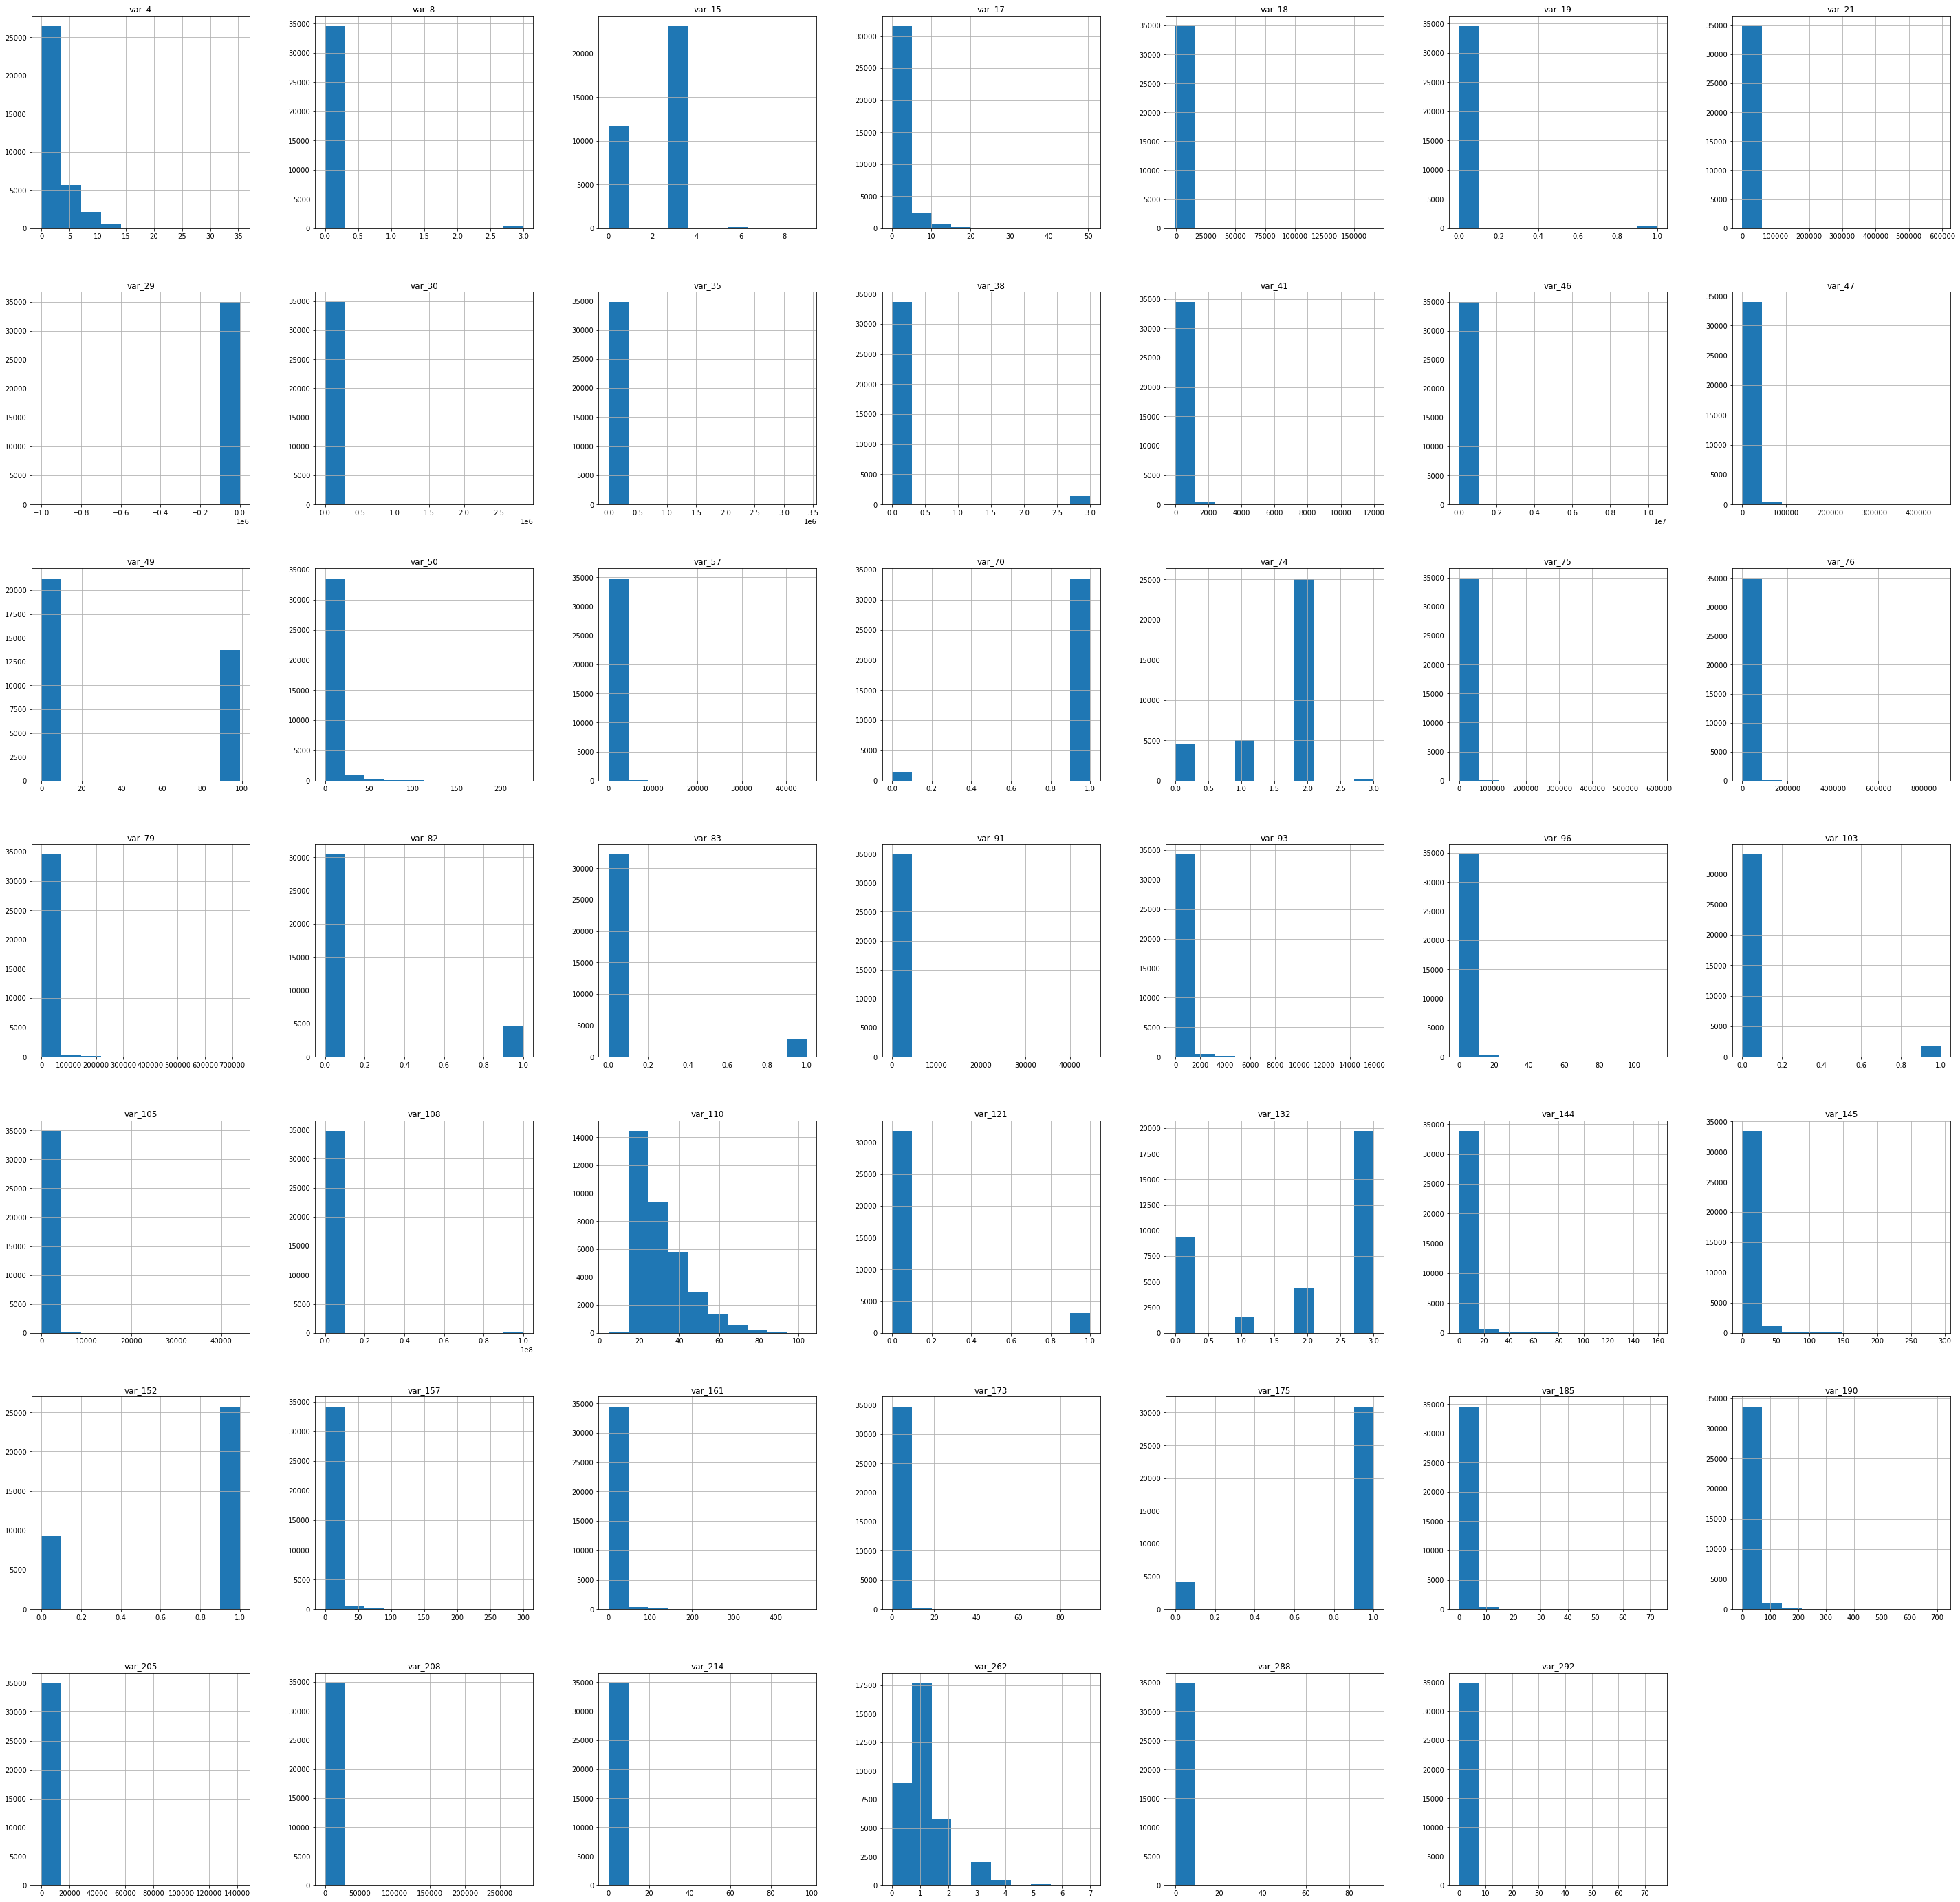

In [106]:
# take a look at dataframe so to find outliers
X_train.hist(figsize=(50, 50))

<span style="color:blue"> <font size="5"> </font> Odcięcie aż 5% wydaje się być zbyt "brutalne", są przypadki gdzie znacząco zaburza to rozkład cechy, bycie wartością maksymalną nie czyni jej outlierem, rozumiemy że nie jest to dla każdej kolumny, tylko dla wybranych. Wydaje nam się że lepszym rozwiązaniem byłoby usunięcie kolumn z małą wariancją. Już raz to robiliście tylko z bardzo zaborczym parametrem 0.99, można zamienić to na 0.95 czy nawet 0.9 i pominąć ten krok i wszystko było by bardziej automatyczne i nie wymagało by ręcznej selekcji kolumn. </span>

In [107]:
# we assume that these columns contain outliers
outliers = [  'var_8',  'var_17',  'var_18',  'var_19',  'var_21',
             'var_29',  'var_30',  'var_35',  'var_38',  'var_41', 'var_46', 'var_47',
             'var_50',  'var_57',  'var_70',  'var_75',  'var_76',
             'var_79',  'var_82',  'var_83',  'var_91',  'var_93', 'var_96', 'var_103',
            'var_105', 'var_108', 'var_121', 'var_144', 'var_145',
            'var_157', 'var_161', 'var_173', 'var_175', 'var_185', 'var_190',
            'var_205', 'var_208', 'var_214', 'var_288', 'var_292']

# check 95% quantile
X_train[outliers].quantile(0.95)

var_8           0.000000
var_17          8.190000
var_18          0.000000
var_19          0.000000
var_21       2775.230640
var_29          2.000000
var_30          0.000000
var_35      86400.000000
var_38          0.000000
var_41        409.392600
var_46     230783.498340
var_47          0.000000
var_50         19.950000
var_57        496.800000
var_70          1.000000
var_75       2760.000000
var_76        979.283730
var_79          0.000000
var_82          1.000000
var_83          1.000000
var_91        826.877385
var_93        686.441250
var_96          2.850000
var_103         1.000000
var_105       261.900000
var_108         0.000000
var_121         1.000000
var_144         8.730000
var_145        26.460000
var_157        19.530000
var_161        22.080000
var_173         2.970000
var_175         1.000000
var_185         3.000000
var_190        62.704500
var_205         0.000000
var_208         0.000000
var_214         0.000000
var_288         0.000000
var_292         0.000000


In [108]:
outliers_val = [x for x in outliers if x in X_val.columns]

In [109]:
X_val[outliers_val].quantile(0.95)

var_8           0.00000
var_17          6.00000
var_18          0.00000
var_21       2477.44800
var_29          2.00000
var_30          0.00000
var_35      78986.88000
var_41        400.82436
var_46     236237.38605
var_47          0.00000
var_50         19.32000
var_57        418.50000
var_70          1.00000
var_75       2355.66618
var_82          1.00000
var_83          1.00000
var_91        831.84888
var_103         1.00000
var_105       264.87000
var_121         1.00000
var_144         8.73000
var_145        25.92000
var_161        21.04200
var_173         2.97000
var_175         1.00000
var_185         2.97000
var_190        60.09300
var_208         0.00000
var_288         0.00000
Name: 0.95, dtype: float64

In [110]:
# replace outliers with NAs
for outlier in outliers:
    col = X_train[outlier]
    X_train[outlier] = np.where(col < col.quantile(0.95), col, float('nan'))

In [111]:
# replace outliers with NAs
for outlier in outliers_val:
    col = X_val[outlier]
    X_val[outlier] = np.where(col < col.quantile(0.95), col, float('nan'))

<span style="color:blue"> <font size="5"> </font>Tutaj widać czemu wasze podejście nie jest najlepsze, cechy przechylone "w lewo" czyli np. binarne w których stosunek jest wiekszy niż 95:5, zostały całkowicie zamienione na nan, a z racji, że nie można policzyć z samych nan mediany więc w kroku 5.4 zostają te kolumny usunięte. Jednak są kolumny w któych nie wszystkie wartości zostają zamienione na nan i mamy takie patologiczne sytuacje jak kolumna var_18 gdzie zostają 3 wartości nie nan, a następnie wszytskie wartości zostają uzupełnione medianą z tych 3 wartości. Łatwo zauważyć że ten proces jest wadliwy. Lepiej jest w kolumach gdzie zostało podmienione 3-5k rekordów ale nadal nie jest to idealne rozwiązanie. Przy tym będąc mozolne gdyż trzeba wybrać ręcznie kolumny, patrzeć na histogramy których w innym przypadku może być więcej niż tu, patrzeć na kwantyle itd. </span>

In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 13889 to 47738
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   var_4    35000 non-null  float64
 1   var_8    0 non-null      float64
 2   var_15   35000 non-null  int64  
 3   var_17   33166 non-null  float64
 4   var_18   3 non-null      float64
 5   var_19   0 non-null      float64
 6   var_21   33250 non-null  float64
 7   var_29   30908 non-null  float64
 8   var_30   0 non-null      float64
 9   var_35   33247 non-null  float64
 10  var_38   0 non-null      float64
 11  var_41   33250 non-null  float64
 12  var_46   33250 non-null  float64
 13  var_47   0 non-null      float64
 14  var_49   35000 non-null  int64  
 15  var_50   33234 non-null  float64
 16  var_57   33248 non-null  float64
 17  var_70   1443 non-null   float64
 18  var_74   35000 non-null  int64  
 19  var_75   33249 non-null  float64
 20  var_76   33250 non-null  float64
 21  var_79  

## 5.2. Handling NAs and/or Nulls

In [113]:
# replace NAs with median
for column in X_train.columns:
    X_train[column].fillna(X_train[column].median(), inplace=True)

In [114]:
# replace NAs with median
for column in X_val.columns:
    X_val[column].fillna(X_val[column].median(), inplace=True)

## 5.3. Normalization or standarization

In [115]:
for column_idx in X_train.columns:
    col = X_train[column_idx]
    X_train[column_idx] = (col - col.min()) / (col.max() - col.min())

In [116]:
for column_idx in X_val.columns:
    col = X_val[column_idx]
    X_val[column_idx] = (col - col.min()) / (col.max() - col.min())

## 5.4. Replacing NAs and/or Nulls

In [117]:
# column can be empty in case all of its values were greater or equal to 97% quantile so all of them turned into NAs
# because of this median is also NA, thus column remains empty
empty = [column for column in X_train.columns if all(X_train[column].isna())]

# remove all empty columns as they do not influence on prediction
X_train.drop(columns=empty, inplace=True)

In [118]:
# column can be empty in case all of its values were greater or equal to 97% quantile so all of them turned into NAs
# because of this median is also NA, thus column remains empty
empty = [column for column in X_val.columns if all(X_val[column].isna())]

# remove all empty columns as they do not influence on prediction
X_val.drop(columns=empty, inplace=True)

# 6. SUMMARY

<span style="color:blue"> <font size="5"> </font>Patrząc na info wszystko tu wygląda ładnie, macie 30 kolumn bez braków danych żyć nie umierać </span>

In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 13889 to 47738
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   var_4    35000 non-null  float64
 1   var_15   35000 non-null  float64
 2   var_17   35000 non-null  float64
 3   var_18   35000 non-null  float64
 4   var_21   35000 non-null  float64
 5   var_29   35000 non-null  float64
 6   var_35   35000 non-null  float64
 7   var_41   35000 non-null  float64
 8   var_46   35000 non-null  float64
 9   var_49   35000 non-null  float64
 10  var_50   35000 non-null  float64
 11  var_57   35000 non-null  float64
 12  var_74   35000 non-null  float64
 13  var_75   35000 non-null  float64
 14  var_76   35000 non-null  float64
 15  var_91   35000 non-null  float64
 16  var_93   35000 non-null  float64
 17  var_96   35000 non-null  float64
 18  var_105  35000 non-null  float64
 19  var_108  35000 non-null  float64
 20  var_110  35000 non-null  float64
 21  var_132 

<span style="color:blue"> <font size="5"> </font>Jednak patrząc na histogramy widać że kolumny jak var_96 czy var_108 dalej są "słabe" pomimo że należą one do zbioru kolumn które próbowaliście naprawić. Jak wcześniej pisaliśmy usunięcie kolumn o małej wariancji byłoby dużo lepsze, szybsze i skuteczniejsze.</span>

array([[<AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_17'}>,
        <AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_21'}>,
        <AxesSubplot:title={'center':'var_29'}>],
       [<AxesSubplot:title={'center':'var_35'}>,
        <AxesSubplot:title={'center':'var_41'}>,
        <AxesSubplot:title={'center':'var_46'}>,
        <AxesSubplot:title={'center':'var_49'}>,
        <AxesSubplot:title={'center':'var_50'}>,
        <AxesSubplot:title={'center':'var_57'}>],
       [<AxesSubplot:title={'center':'var_74'}>,
        <AxesSubplot:title={'center':'var_75'}>,
        <AxesSubplot:title={'center':'var_76'}>,
        <AxesSubplot:title={'center':'var_91'}>,
        <AxesSubplot:title={'center':'var_93'}>,
        <AxesSubplot:title={'center':'var_96'}>],
       [<AxesSubplot:title={'center':'var_105'}>,
        <AxesSubplot:title={'center':'var_108'}>,
        <AxesSub

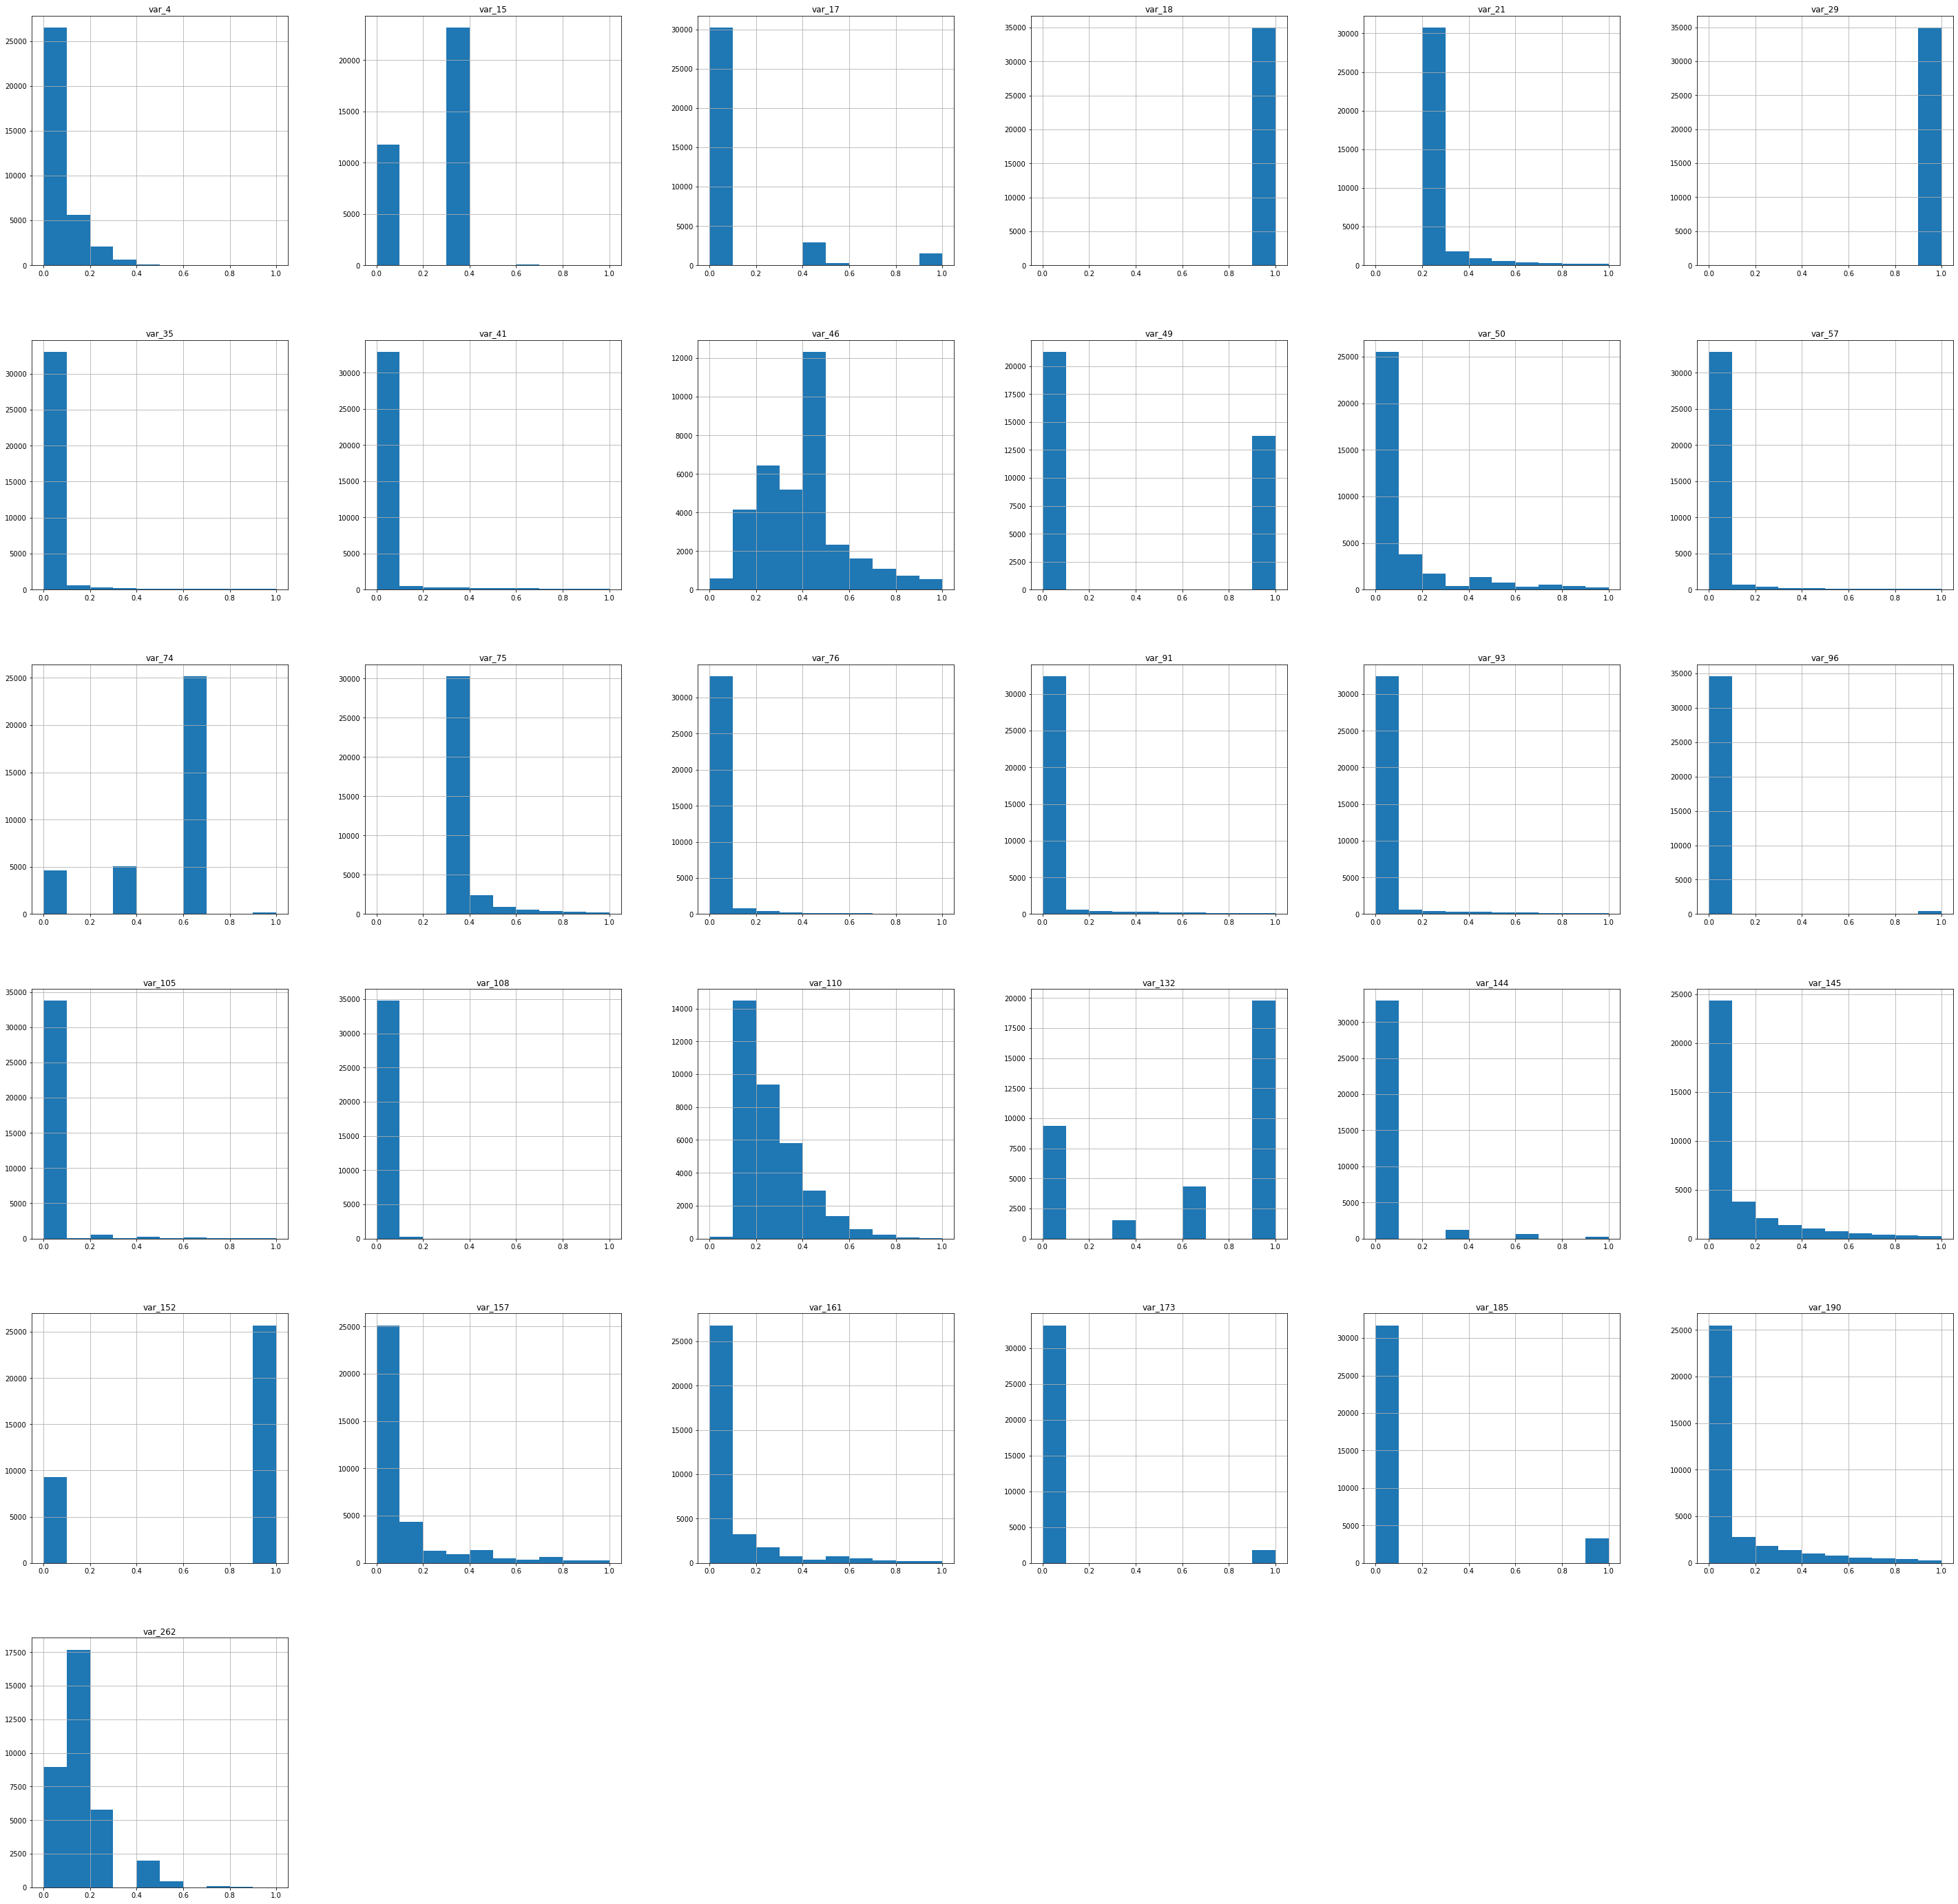

In [120]:
X_train.hist(figsize=(50, 50))

array([[<AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_17'}>,
        <AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'center':'var_21'}>,
        <AxesSubplot:title={'center':'var_29'}>],
       [<AxesSubplot:title={'center':'var_31'}>,
        <AxesSubplot:title={'center':'var_35'}>,
        <AxesSubplot:title={'center':'var_37'}>,
        <AxesSubplot:title={'center':'var_41'}>,
        <AxesSubplot:title={'center':'var_46'}>,
        <AxesSubplot:title={'center':'var_49'}>],
       [<AxesSubplot:title={'center':'var_50'}>,
        <AxesSubplot:title={'center':'var_57'}>,
        <AxesSubplot:title={'center':'var_58'}>,
        <AxesSubplot:title={'center':'var_62'}>,
        <AxesSubplot:title={'center':'var_74'}>,
        <AxesSubplot:title={'center':'var_75'}>],
       [<AxesSubplot:title={'center':'var_91'}>,
        <AxesSubplot:title={'center':'var_105'}>,
        <AxesSubp

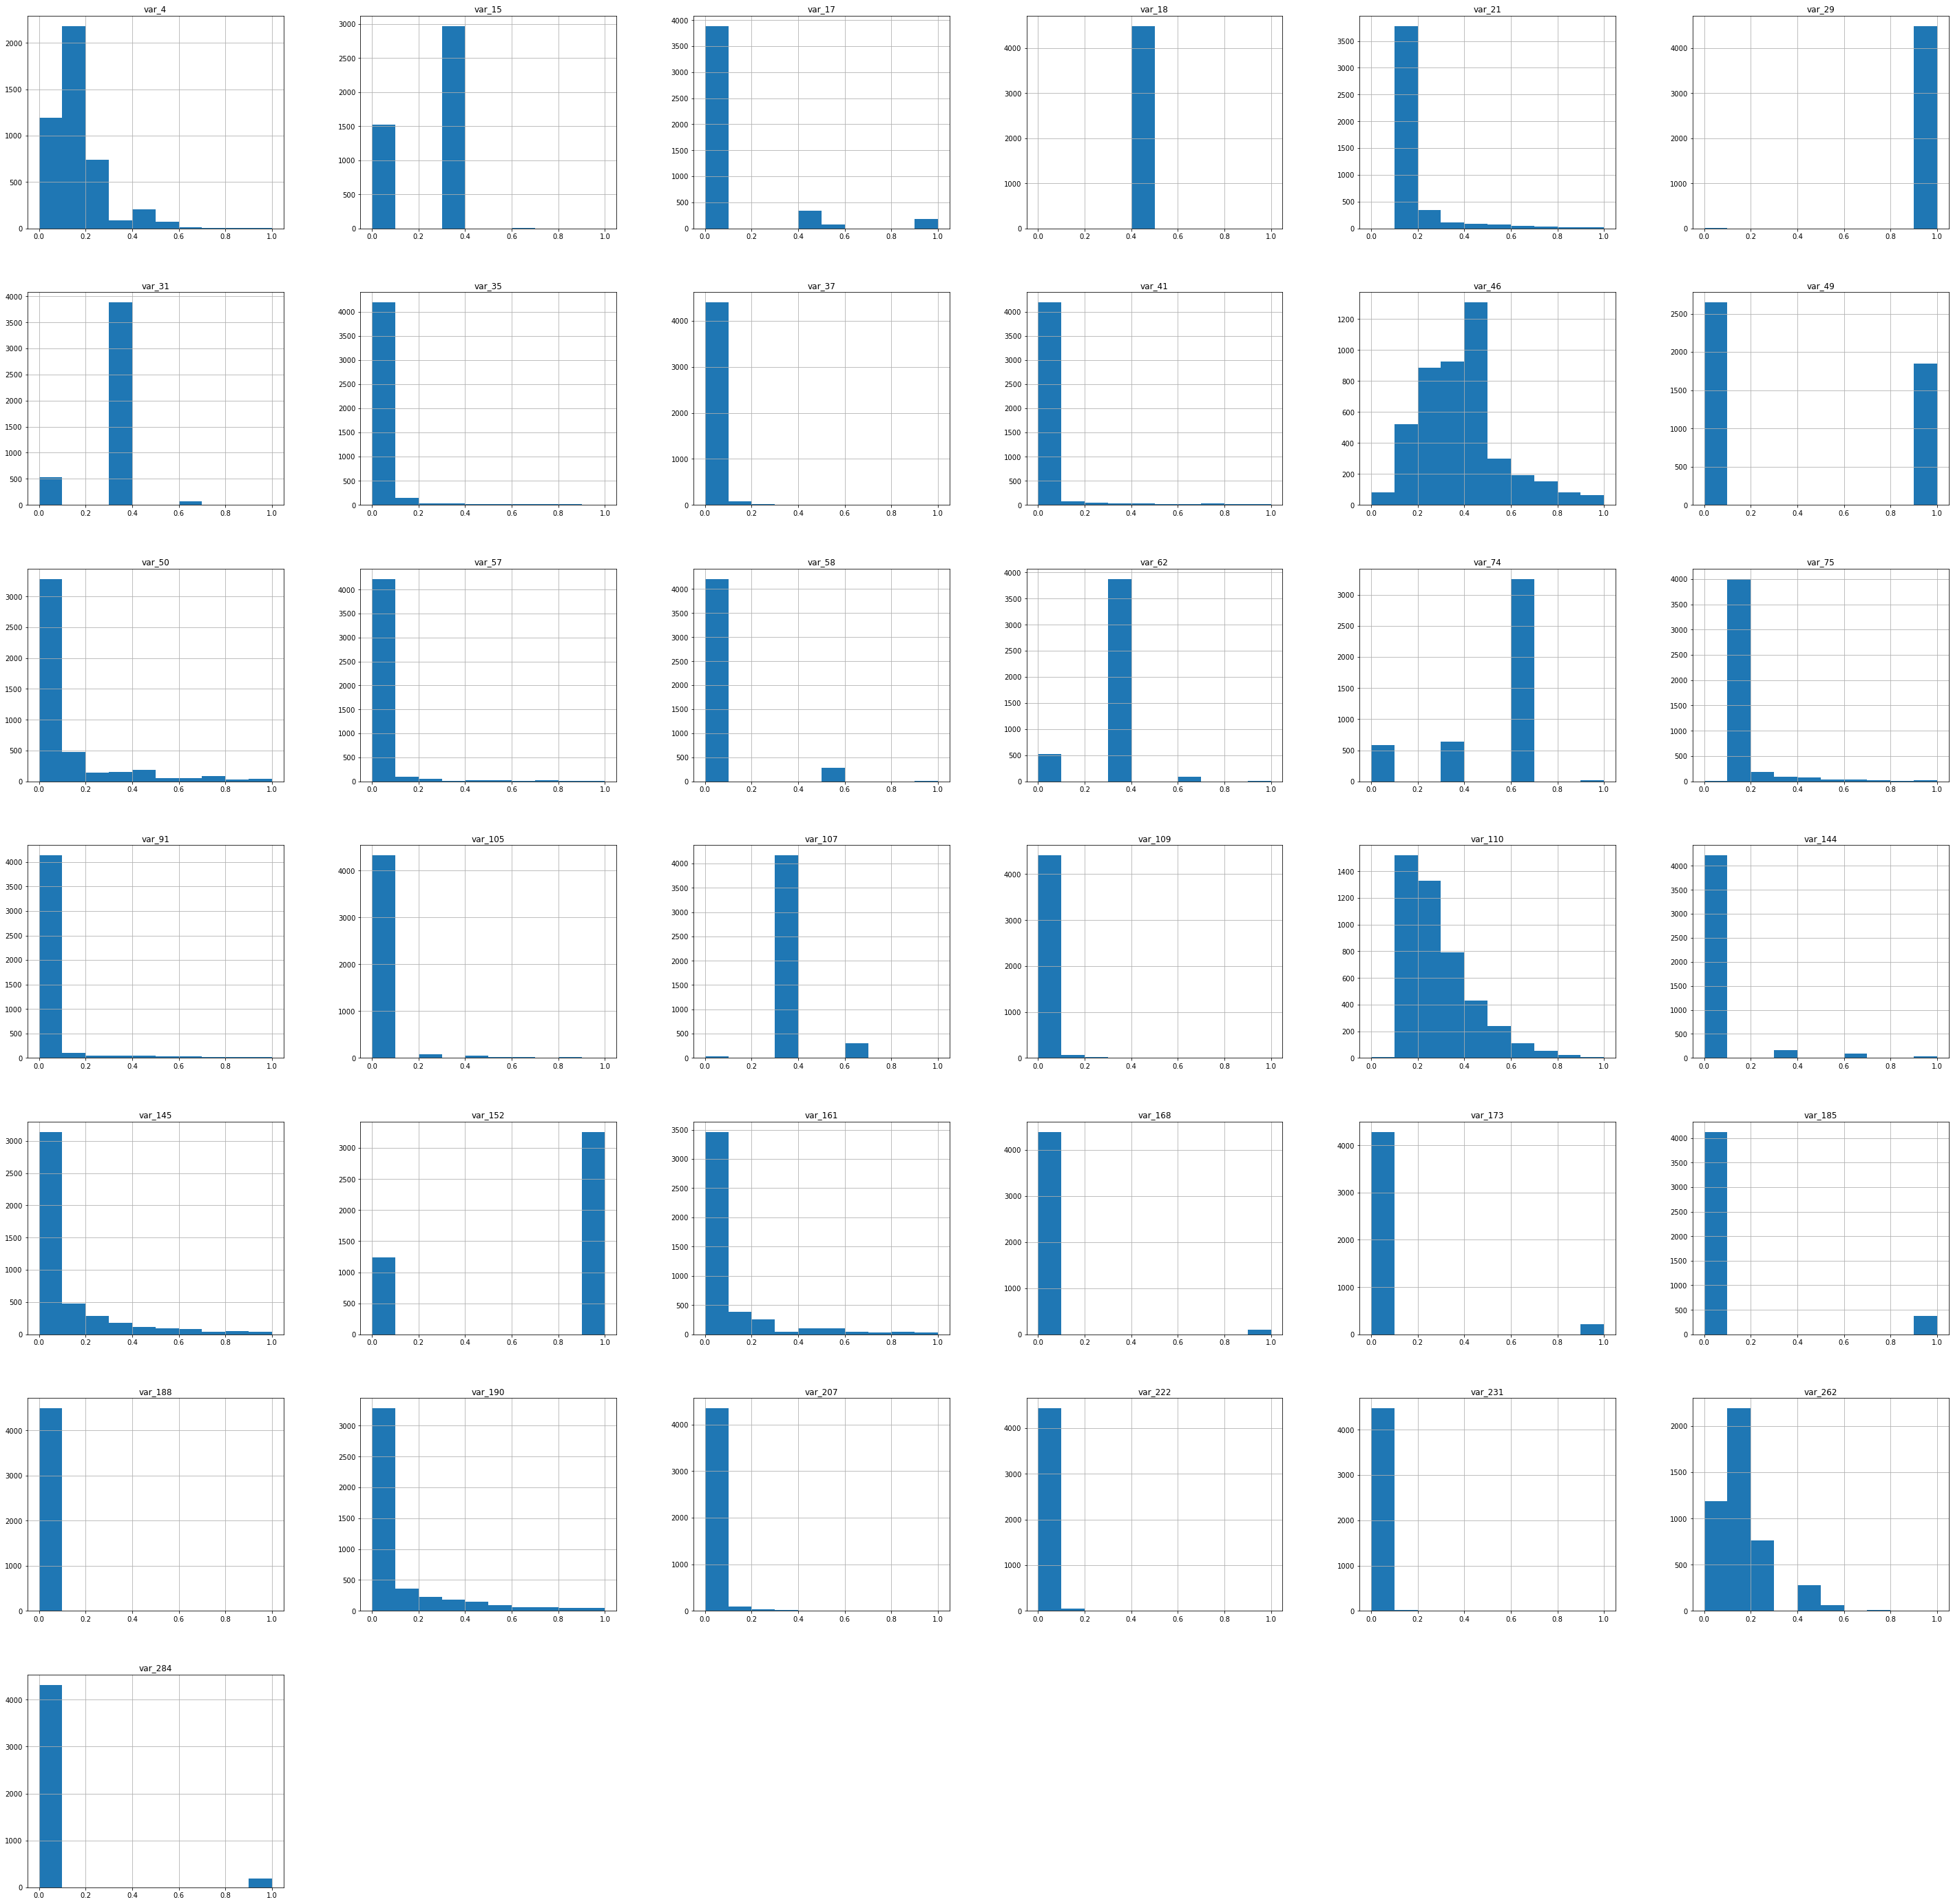

In [124]:
X_val.hist(figsize=(50, 50))

<span style="color:blue"> <font size="5"> </font>Tu fajnie wyszły wam w miarę nieskorelowanie </span>

<AxesSubplot:>

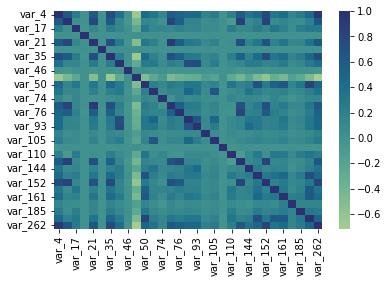

In [121]:
mc = X_train.corr(method="spearman")
sb.heatmap(mc, cmap="crest")

<AxesSubplot:>

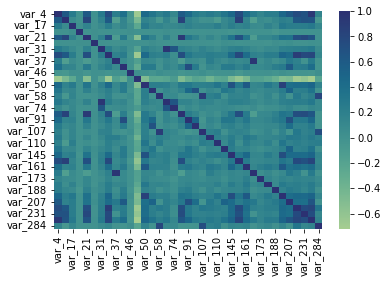

In [122]:
mcc = X_val.corr(method="spearman")
sb.heatmap(mcc, cmap="crest")

# EXPORTING

In [123]:
# exporting preprocessed dataset to csv
relative_path = "./preprocessed"

if not os.path.exists(relative_path):
    os.makedirs(relative_path)
    
X_train.to_csv('preprocessed/train_dataset_1.csv', encoding='utf-8')